<a href="https://colab.research.google.com/github/rizalramle21/rice-leaf-disease-classification-using-SVM/blob/main/training_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/klasifikasi_daun (35).csv')
data

,Unnamed: 0,Contrast,Homogeneity,Energy,Correlation,Hue_Mean,Saturation_Mean,Value_Mean,Label
0,0,84.436940,0.400464,0.108820,0.983577,30.597691,185.982306,132.878529,1
1,1,154.303178,0.341230,0.082394,0.971853,33.202920,195.128820,111.088765,1
2,2,159.526348,0.306531,0.059587,0.974089,30.056350,180.344562,131.705742,1
3,3,93.359842,0.385140,0.110287,0.985092,31.922045,196.354772,134.908184,1
4,4,190.045879,0.337747,0.098726,0.963700,33.215077,200.112790,108.260898,1
...,...,...,...,...,...,...,...,...,...
595,595,205.387326,0.316363,0.061920,0.973159,40.310588,115.306504,109.181130,5
596,596,88.182831,0.228965,0.037397,0.964767,33.823322,193.549636,119.691631,5
597,597,513.279523,0.251795,0.045427,0.939821,32.073127,206.324064,108.596207,5
598,598,1036.447554,0.704701,0.693043,0.742268,34.375705,121.389849,187.277057,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       600 non-null    int64  
 1   Contrast         600 non-null    float64
 2   Homogeneity      600 non-null    float64
 3   Energy           600 non-null    float64
 4   Correlation      600 non-null    float64
 5   Hue_Mean         600 non-null    float64
 6   Saturation_Mean  600 non-null    float64
 7   Value_Mean       600 non-null    float64
 8   Label            600 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 42.3 KB


In [ ]:
data = data.iloc[:, 1:]
data

,Contrast,Homogeneity,Energy,Correlation,Hue_Mean,Saturation_Mean,Value_Mean,Label
0,84.436940,0.400464,0.108820,0.983577,30.597691,185.982306,132.878529,1
1,154.303178,0.341230,0.082394,0.971853,33.202920,195.128820,111.088765,1
2,159.526348,0.306531,0.059587,0.974089,30.056350,180.344562,131.705742,1
3,93.359842,0.385140,0.110287,0.985092,31.922045,196.354772,134.908184,1
4,190.045879,0.337747,0.098726,0.963700,33.215077,200.112790,108.260898,1
...,...,...,...,...,...,...,...,...
595,205.387326,0.316363,0.061920,0.973159,40.310588,115.306504,109.181130,5
596,88.182831,0.228965,0.037397,0.964767,33.823322,193.549636,119.691631,5
597,513.279523,0.251795,0.045427,0.939821,32.073127,206.324064,108.596207,5
598,1036.447554,0.704701,0.693043,0.742268,34.375705,121.389849,187.277057,5


In [ ]:
# from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pickle

# Buat pipeline yang berisi StandardScaler + SVC
model = make_pipeline(
    StandardScaler(),
    SVC(C=100, gamma=0.1)  # Gunakan hasil dari tuning
)

In [ ]:
# data pandas
# split data training-testing
y = data['Label']
df_train, df_test = train_test_split(data, test_size=0.2, random_state=46, stratify=y)

# train model
model.fit(df_train.drop('Label', axis=1), df_train['Label'])

# evaluasi model
y_pred = model.predict(df_test.drop('Label', axis=1))
print(classification_report(df_test['Label'], y_pred))

# # simpan model
# with open("model_pandas.pkl", "wb") as model_file:
#     pickle.dump(model, model_file)

              precision    recall  f1-score   support

           1       0.85      0.92      0.88        24
           2       0.79      0.92      0.85        24
           3       0.84      0.88      0.86        24
           4       0.88      0.88      0.88        24
           5       0.94      0.67      0.78        24

    accuracy                           0.85       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.86      0.85      0.85       120



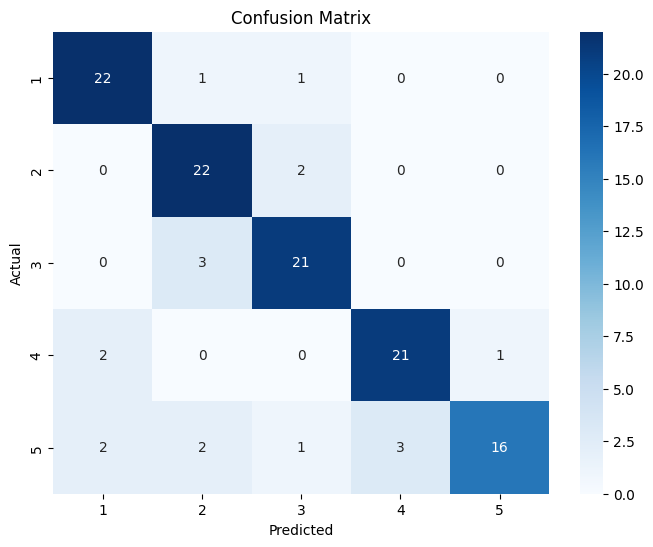

In [ ]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(df_test['Label'], y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:


from sklearn.model_selection import StratifiedKFold, cross_val_score

# Tentukan fitur (X) dan label (y)
X = data.drop('Label', axis=1)
y = data['Label']

# Buat objek StratifiedKFold
# n_splits adalah jumlah fold, shuffle=True untuk mengacak data
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=46)

# Lakukan cross-validation
# scoring='accuracy' menggunakan akurasi sebagai metrik evaluasi
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Tampilkan hasil cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")
print(f"Standard deviation of cross-validation accuracy: {cv_scores.std()}")


Cross-validation scores: [0.85833333 0.825      0.85       0.88333333 0.85833333]
Mean cross-validation accuracy: 0.8549999999999999
Standard deviation of cross-validation accuracy: 0.018708286933869712
